In [3]:
%pip install graphviz
%pip install fastbook
%pip install fastai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastbook import *

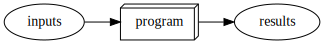

In [4]:
gv('''program[shape=box3d]
inputs->program->results''')

In [4]:
def predict_illness(symptoms: list[str]) -> str:
    if 'fever' in symptoms:
        if 'cough' in symptoms:
            return 'flu'
        elif' sore throat' in symptoms:
            return 'cold'
        elif 'vomitting' in symptoms:
            return 'food poisoning'
        else:
            return 'unknown'
    elif 'rash' in symptoms:
        return 'measles'
    else:
        return 'unknown'

In [5]:
print(predict_illness(['fever', 'cough']))
print(predict_illness(['fever', 'vomitting']))

flu
food poisoning


In [ ]:
def is_valid(board, row, col):
    # Check if there is a queen in the same row
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Check if there is a queen in the upper diagonal
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check if there is a queen in the lower diagonal
    for i, j in zip(range(row, len(board)), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

def solve_queen(board, col):
    # Base case: all queens are placed
    if col == len(board):
        print_board(board)
        return True

    # Recursive case: try to place a queen in each row of the current column
    for i in range(len(board)):
        if is_valid(board, i, col):
            board[i][col] = 1
            solve_queen(board, col + 1)
            board[i][col] = 0

    return False

def print_board(board):
    for row in board:
        for cell in row:
            if cell == 1:
                print("Q", end=" ")
            else:
                print(".", end=" ")
        print()
    print()

# Initialize the board
n = 8
board = [[0] * n for _ in range(n)]

# Solve the eight queen problem
solve_queen(board, 0)

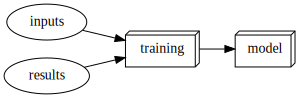

In [5]:
gv('''training[shape=box3d]
model[shape=box3d]
    inputs->training->model
   results->training''')

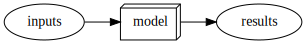

In [6]:
gv('''
model[shape=box3d]
inputs -> model -> results 
   ''')

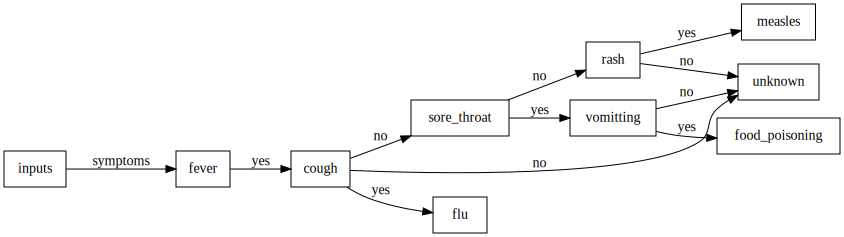

In [7]:
gv('''
    node [shape=box]
    inputs -> fever [label="symptoms"]
    fever -> cough [label="yes"]
    cough -> sore_throat [label="no"]
    cough -> flu [label="yes"]
    cough -> unknown [label="no"]
    sore_throat -> vomitting [label="yes"]
    sore_throat -> rash [label="no"]
    vomitting -> food_poisoning [label="yes"]
    vomitting -> unknown [label="no"]
    rash -> measles [label="yes"]
    rash -> unknown [label="no"]
''') 

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Define the dependent variable
dep_var = 'Survived'

# Define the categorical and continuous variables
cat_names = ['Pclass', 'Sex', 'Embarked']
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']

# Preprocess the data
df = df[cat_names + cont_names + [dep_var]].dropna()
df[cat_names] = df[cat_names].apply(lambda x: pd.factorize(x)[0])
X = df[cat_names + cont_names]
y = df[dep_var]

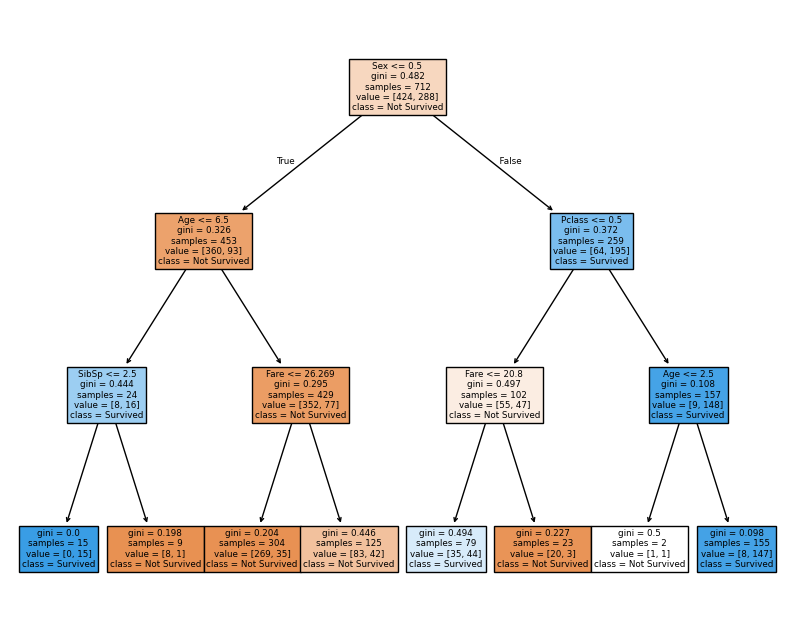

In [10]:
# Create the decision tree model
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

# Print the decision tree
plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=cat_names+cont_names, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [11]:
# Use the tree to infer

tree.predict([[1, 1, 0, 35.0, 1, 0, 52.1000]])

/home/teguhteja/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])